## 住宅価格の回帰

## 今回使う手法の一覧  

scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


線形回帰
SVM
決定木
ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。



### 練習のための準備  
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。



## 【問題1】練習のために特徴量の選択  
>データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# データセットcsvをpandasuに読み込む

csv_path = "./Kaggle_data/train.csv" # ファイル名（パス）を指定する
df_data = pd.read_csv(csv_path)

# 条件に従って抜き出し
df_X = df_data[['GrLivArea', 'YearBuilt']]
df_y = df_data['SalePrice']

df = pd.concat([df_X, df_y], axis=1)

display(df)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


## 【問題2】線形回帰による推定と評価  

>データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。
>
>評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。
>
>可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
>scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。



### データの分析  

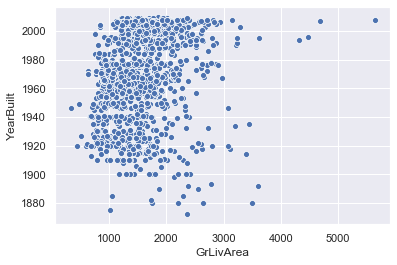

In [3]:
# 散布図の作成（特徴量同士）
sns.scatterplot(df['GrLivArea'], df['YearBuilt'])

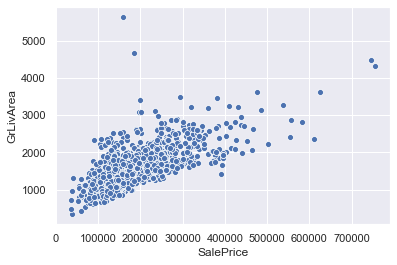

In [4]:
# 目的変数と関係（GrLivArea）
sns.scatterplot(df['SalePrice'], df['GrLivArea'])

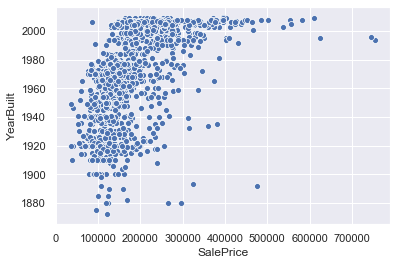

In [5]:
# 目的変数と関係（YearBuilt）
sns.scatterplot(df['SalePrice'], df['YearBuilt'])

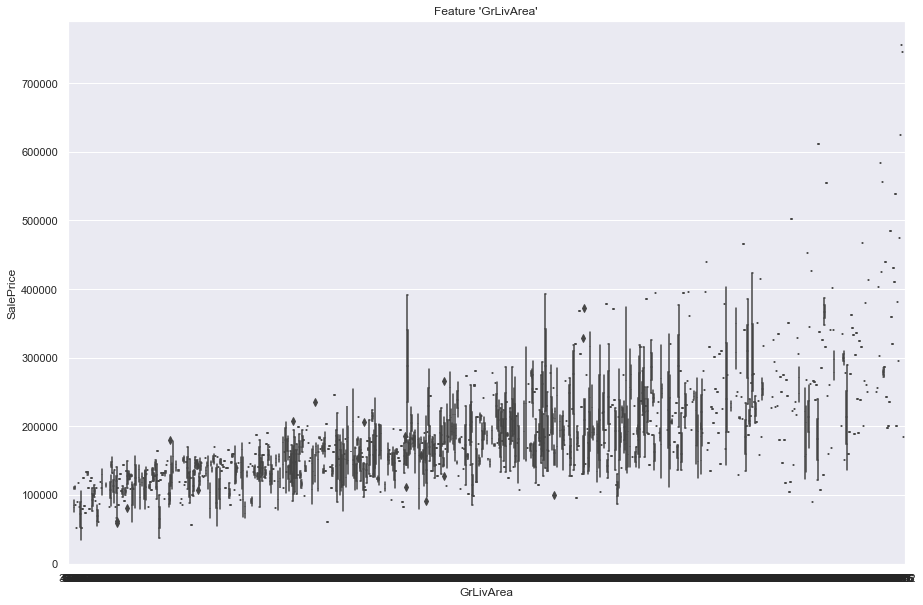

In [6]:
# 箱ひげ図の作成（GrLivArea）
plt.rcParams['figure.figsize']=(15,10) 
plt.title('Feature \'GrLivArea\'')
sns.boxplot(x=df['GrLivArea'], y=df['SalePrice'])

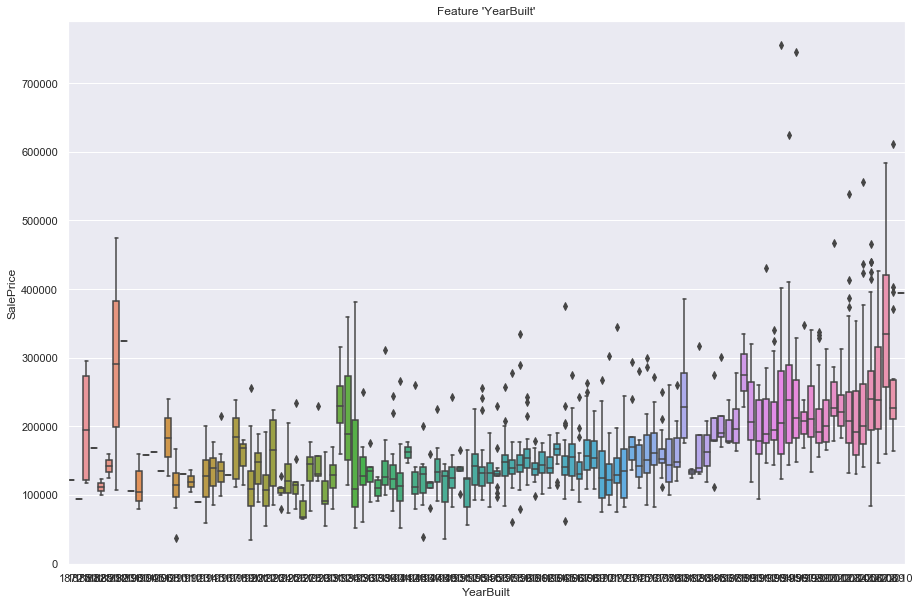

In [7]:
# 箱ひげ図の作成（YearBuilt）
plt.rcParams['figure.figsize']=(15,10) 
plt.title('Feature \'YearBuilt\'')
sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'] )

Text(0.5, 1.0, "Feature 'GrLivArea'")

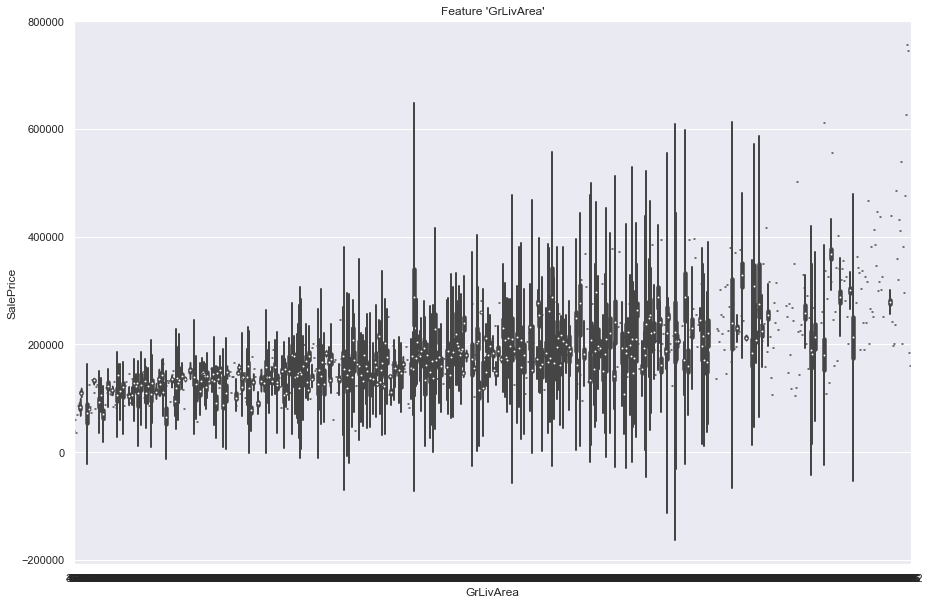

In [8]:
# GrLivAreaの特徴量の分布
plt.rcParams['figure.figsize']=(15,10) 
sns.violinplot(x=df['GrLivArea'], y=df['SalePrice'])\
                                    .set_title('Feature \'GrLivArea\'')

Text(0.5, 1.0, "Feature 'YearBuilt'")

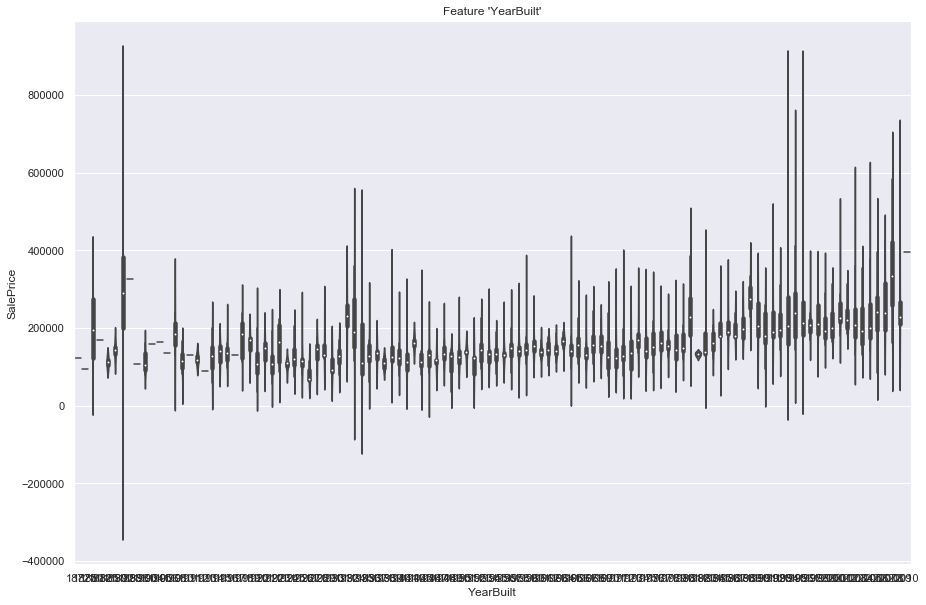

In [9]:
# YearBuilt の特徴量の分布
plt.rcParams['figure.figsize']=(15,10) 
sns.violinplot( x=df['YearBuilt'], y=df['SalePrice'] )\
                                    .set_title('Feature \'YearBuilt\'')

### 前処理

In [10]:
# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納

X = np.array(df[['GrLivArea','YearBuilt']])
y = np.array(df['SalePrice'])
print(X)
print(y)

[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[208500 181500 223500 ... 266500 142125 147500]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1095, 2)
(1095,)
(365, 2)
(365,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#表示行数を１０行に設定
np.set_printoptions(threshold=10)
print(X_train_scaled)
print(X_test_scaled)

[[ 1.64748115 -2.61683012]
 [-0.09521056  0.6622233 ]
 [-1.08660851 -0.19894225]
 ...
 [ 0.73740881  0.23164052]
 [ 0.06937699  1.05968432]
 [ 0.61542039  0.89407556]]
[[ 1.9243755  -0.46391626]
 [ 0.1100398  -0.99386429]
 [-0.61608175 -0.69576852]
 ...
 [ 0.00741462  0.96031906]
 [ 0.09648553  1.19217132]
 [-1.40416567 -2.02063859]]


### 線形回帰による学習

In [13]:
# 線形回帰で学習させる
from sklearn.linear_model import LinearRegression

linear = LinearRegression()# インスタンス化
linear.fit(X_train_scaled, y_train)# 学習
y_pred = linear.predict(X_test_scaled)# 予測

print("線形回帰による予測\n{}".format(y_pred))

線形回帰による予測
[264130.40861155 155093.63716252 127493.47870881 ... 211298.41331189
 223121.80593696  45720.35056089]


In [14]:
# 検証の事前確認として、テストの正解データを表示
print("テストデータ\n{}".format(y_test))

テストデータ
[200624 133000 110000 ... 235000 239000  85000]


In [15]:
# 平均二乗誤差（Mean Squared Error, MSE）
    
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2725908099.063638

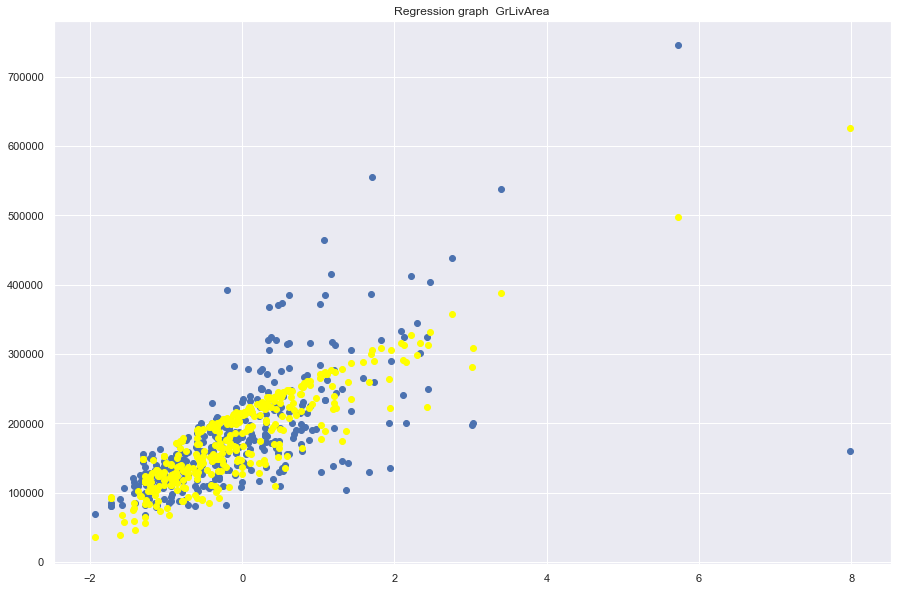

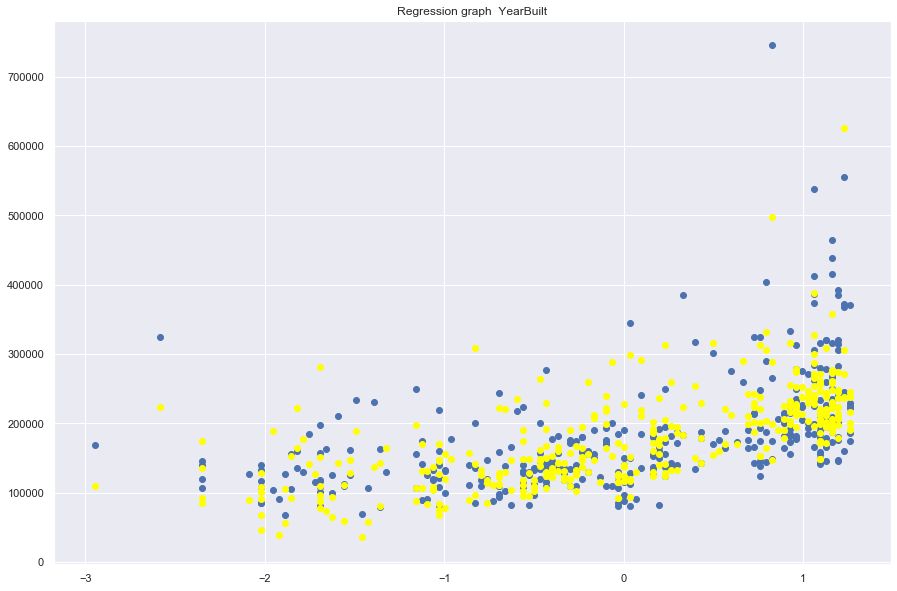

In [16]:
# 可視化する関数を作成。
def regression_graph(X_test_scaled, y_pred, y_test, graph_title='Regression graph', features=['GrLivArea', 'YearBuilt']):
    """
    学習した回帰モデルによる予測データと、テストの正解データを可視化する関数。

    Parameters
    ----------------
    X_test_scaled : ndarray
        標準化した特徴量のデータ
    y_pred : ndarray
        予測データ
    y_test : ndarray
        正解データ
    graph_title : list
        グラフのタイトルの文章を与える
    """
    feat = pd.DataFrame(X_test_scaled)
    
    for f in range(len(features)):
        feat_x = feat.iloc[:,f]
        plt.title(graph_title + '  ' + features[f])
        plt.scatter(feat_x, y_test)
        plt.scatter(feat_x, y_pred, c="yellow")
        plt.show()
    
regression_graph(X_test_scaled, y_pred, y_test)



## 【問題3】手法の比較  

>以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
>
>- 線形回帰
>- SVM
>- 決定木
>- ランダムフォレスト

In [17]:
# 精度の一覧表用の空のリストを用意
verification_result = []


# 線形回帰
verification_linear = ['LinearRegression']

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred_li = linear.predict(X_test_scaled)

# 平均二乗誤差（Mean Squared Error, MSE）    
verification_linear.append(mean_squared_error(y_test, y_pred_li))



# SVM
verification_svm = ['SVM']

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_scaled, y_train)
y_pred_s = svm.predict(X_test_scaled)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_svm.append(mean_squared_error(y_test, y_pred_s))



# 決定木
verification_tree = ['DecisionTree']

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaled, y_train)
y_pred_t = tree.predict(X_test_scaled)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_tree.append(mean_squared_error(y_test, y_pred_t))



# ランダムフォレスト
verification_forest = ['RandomForest']

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2, random_state=0)# インスタンス化
forest.fit(X_train_scaled, y_train)
y_pred_f = forest.predict(X_test_scaled)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_forest.append(mean_squared_error(y_test, y_pred_f))




# 表を作成するために計算結果を２次元配列にする
verification_result = [
            verification_linear, 
            verification_svm, 
            verification_tree, 
            verification_forest
        ]


# 行と列のインデックスようのリストを用意
data_columns=['Model', '平均二乗誤差（MSE）']

# pandas のデータフレームにする
df_verification = pd.DataFrame(data=verification_result, columns=data_columns)
display(df_verification)


,Model,平均二乗誤差（MSE）
0,LinearRegression,2.725908e+09
1,SVM,3.136918e+09
2,DecisionTree,3.422948e+09
3,RandomForest,3.871494e+09


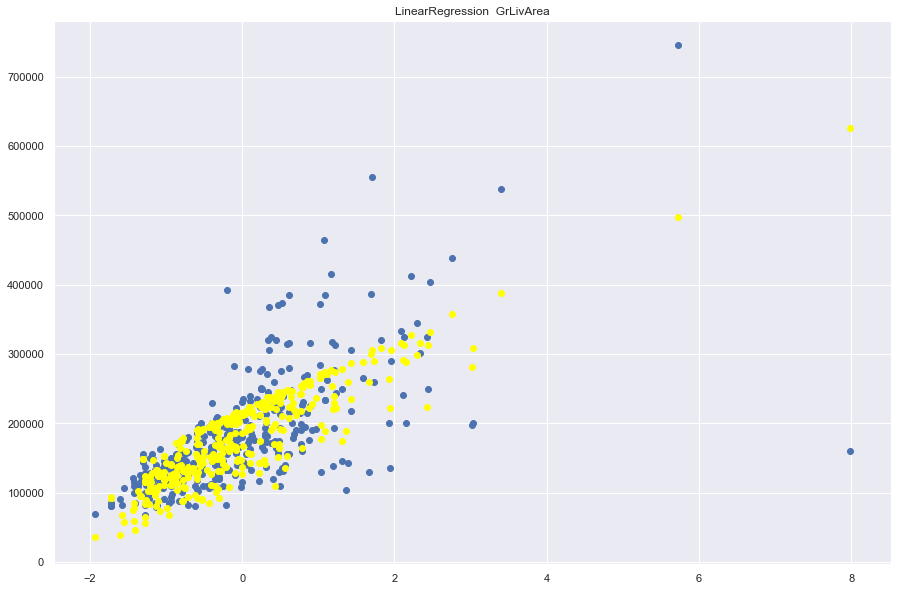

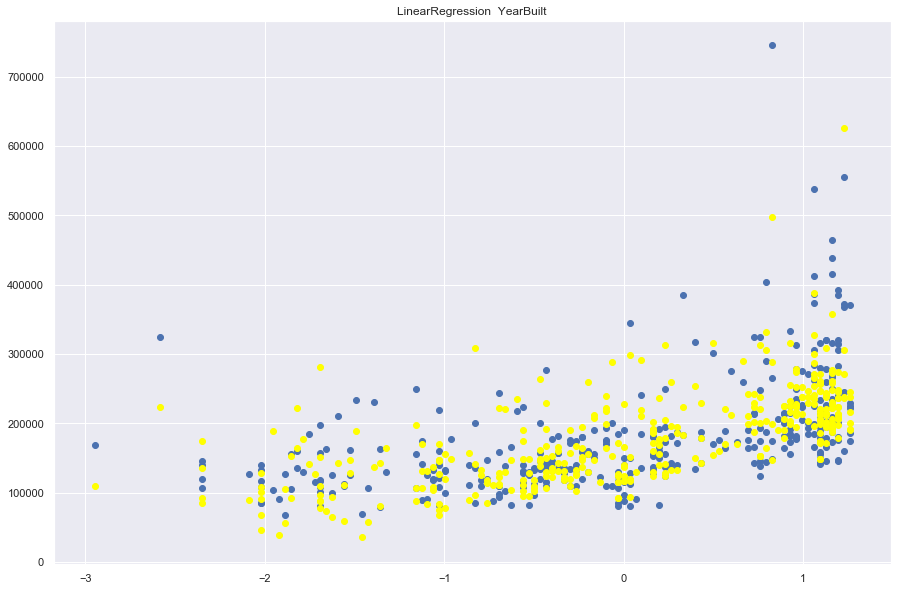

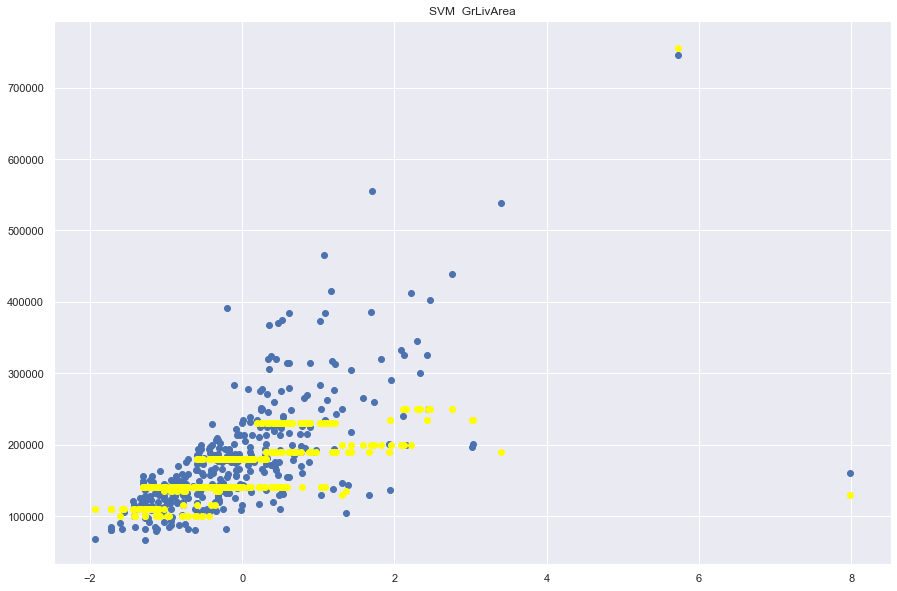

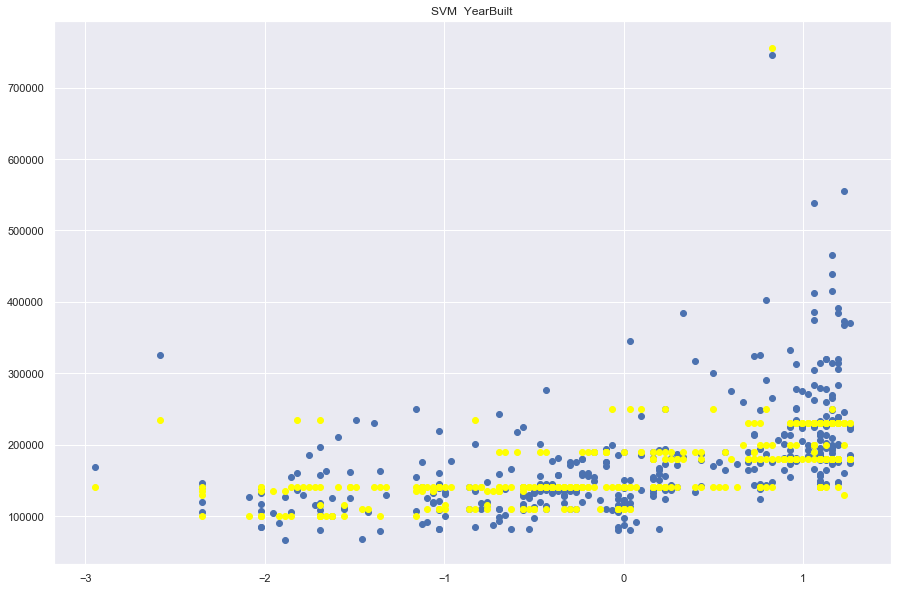

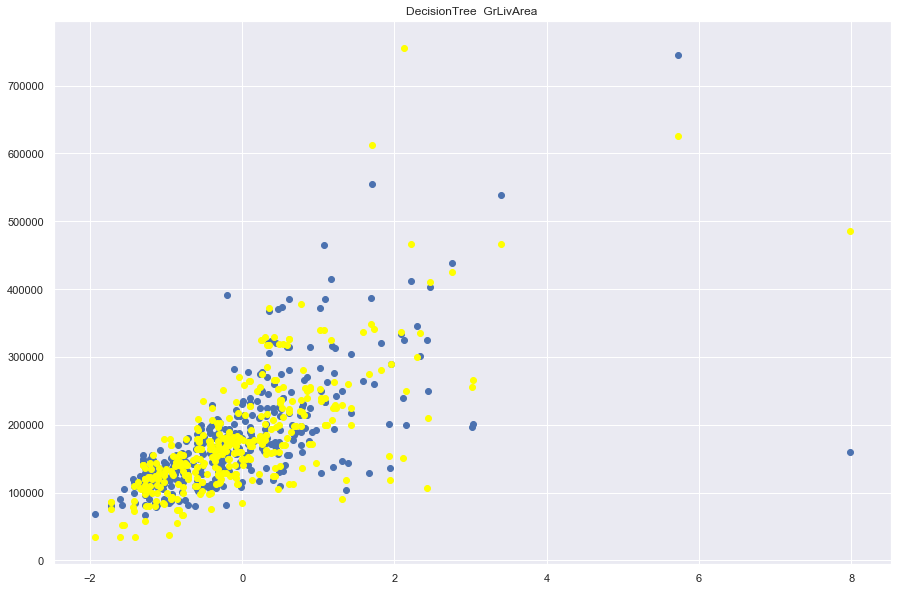

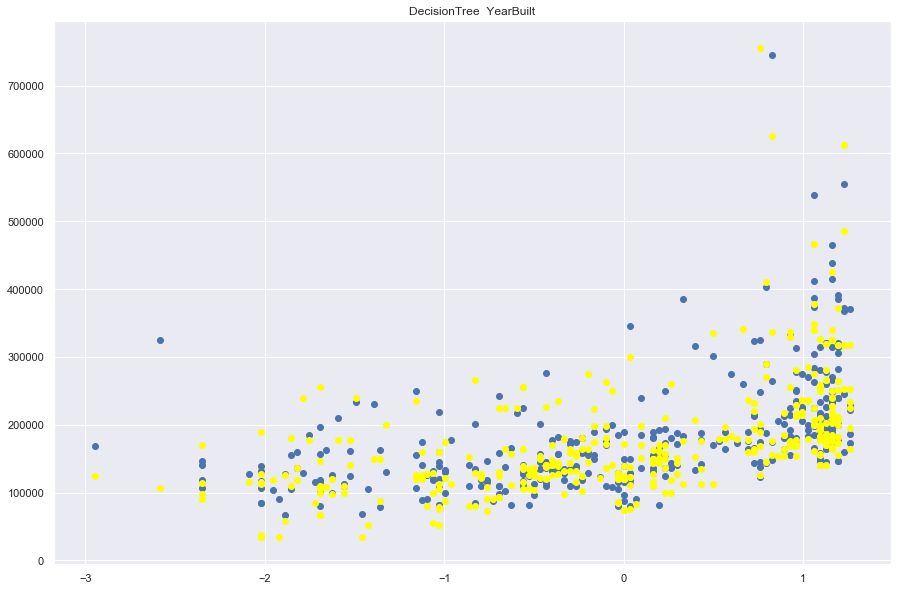

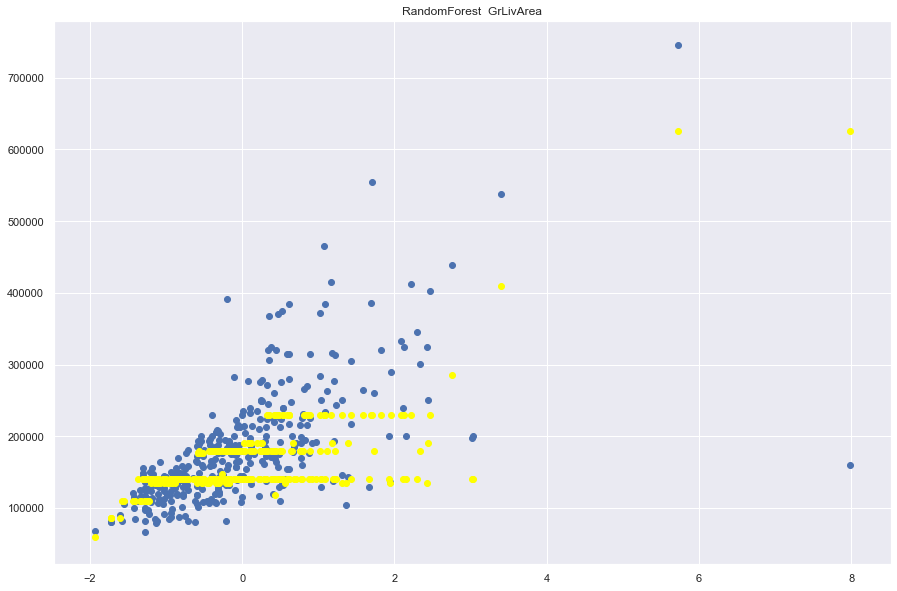

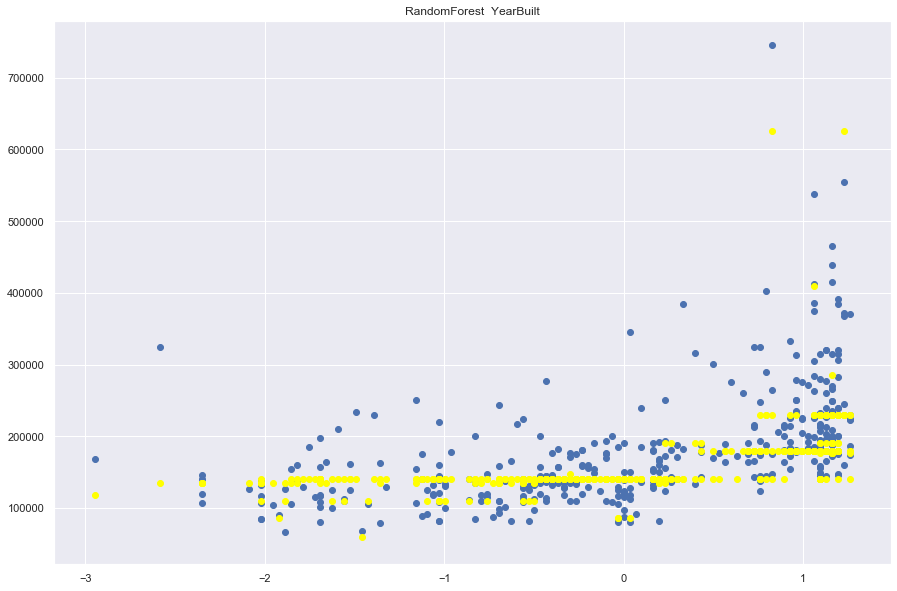

In [18]:
regression_graph(X_test_scaled, y_pred_li, y_test, graph_title='LinearRegression')
regression_graph(X_test_scaled, y_pred_s, y_test, graph_title='SVM')
regression_graph(X_test_scaled, y_pred_t, y_test, graph_title='DecisionTree')
regression_graph(X_test_scaled, y_pred_f, y_test, graph_title='RandomForest')

線形回帰が最も誤差が少なく、精度が高かった。続いて、SVM、決定木と続き、ランダムフォレストが  
最も精度が低かった。  
グラフを見ると、線形回帰は大きく外れたものを除き、価格帯にかかわらず全体的にデータと
重なっているように見えるが、その他のグラフは、外れ値への予測はしているが  
全体的に予測値が低すぎるなど、テストデータと重なっていない箇所が多いように思われる。  
各手法のグラフの特徴は以下の通り。  

- 線形回帰  
高めに外れた値への対応はできていない傾向にあるが、全体としてデータと重なっている。
- SVM  
極端な値の予測は合っていたが、全体的に予測が低くなりすぎ、外れているものがやや多い。
- 決定木  
大まかにはテストデータと合っているが、外れ値の予測などが外れており、それにより精度が下がっているのではないかと思われる。
- ランダムフォレスト  
予測値のレンジが狭く、高めの価格や低めの価格の予測をカバーできていないため、精度が下がっている。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習  

>ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。
>どう選択・加工するかにはデータ分析が重要になってきます。
>
>KaggleのNotebooksも参考にできます。
>
>House Prices: Advanced Regression Techniques | Kaggle

(reference)https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

目的変数である'SalePrice'との相関性や関連性があるデータを選んで特徴量に加えることが望ましい。  
'TotalBsmtSF'および'OverallQual'が目的関数との関連性が高いと思われるため、この二つを特徴量に分析を行うこととする。


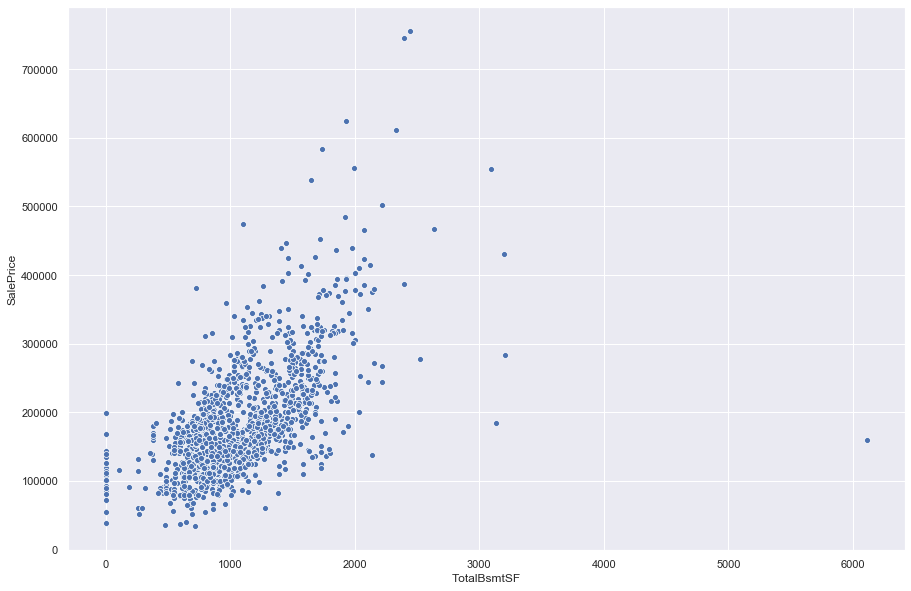

In [19]:
# TotalBsmtSF　の可視化
sns.scatterplot(df_data['TotalBsmtSF'], df_data['SalePrice'])

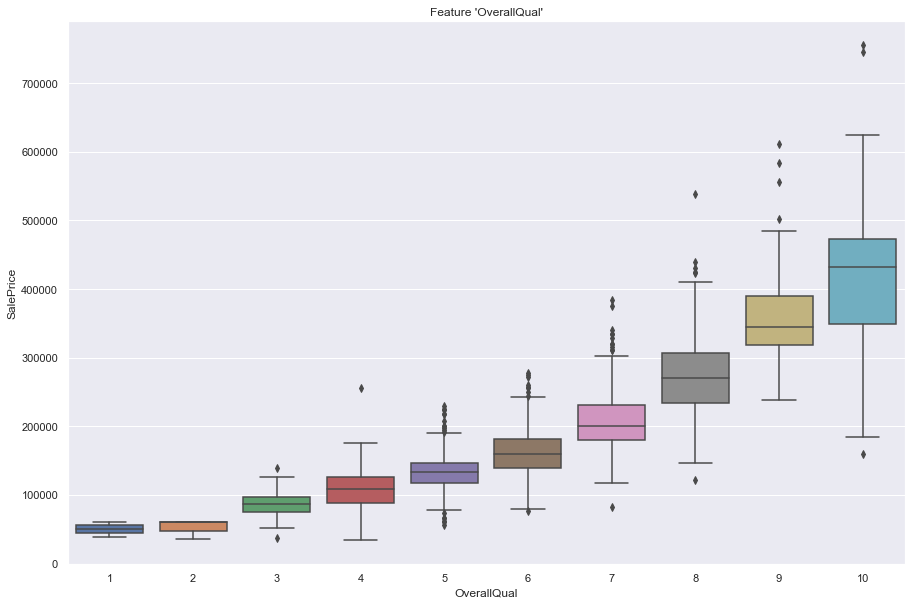

In [20]:
# OverallQual　の可視化１
plt.title('Feature \'OverallQual\'')
sns.boxplot(x=df_data['OverallQual'], y=df_data['SalePrice'] )

Text(0.5, 1.0, "Feature 'OverallQual'")

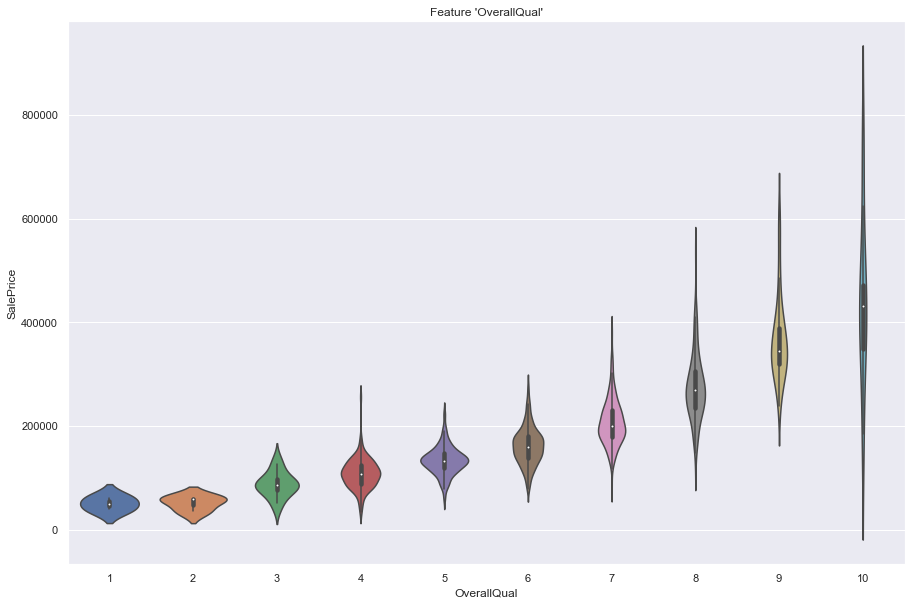

In [21]:
# OverallQual　の可視化２
sns.violinplot( x=df_data['OverallQual'], y=df_data['SalePrice'] )\
                                    .set_title('Feature \'OverallQual\'')

In [22]:
# データの抜き出し
df_X_adv = df_data[['GrLivArea', 'YearBuilt','TotalBsmtSF','OverallQual']]
df_y_adv = df_data['SalePrice']

df_adv = pd.concat([df_X_adv, df_y_adv], axis=1)

display(df_adv)

,GrLivArea,YearBuilt,TotalBsmtSF,OverallQual,SalePrice
0,1710,2003,856,7,208500
1,1262,1976,1262,6,181500
2,1786,2001,920,7,223500
3,1717,1915,756,7,140000
4,2198,2000,1145,8,250000
...,...,...,...,...,...
1455,1647,1999,953,6,175000
1456,2073,1978,1542,6,210000
1457,2340,1941,1152,7,266500
1458,1078,1950,1078,5,142125


In [23]:
# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納

X_adv = np.array(df_adv[['GrLivArea','YearBuilt','TotalBsmtSF','OverallQual']])
y_adv = np.array(df_adv['SalePrice'])

# 学習データとテストデータに分割する
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.25, random_state=0)

print(X_train_adv.shape)
print(y_train_adv.shape)
print(X_test_adv.shape)
print(y_test_adv.shape)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train_adv)
X_train_scaled_adv = scaler.transform(X_train_adv)
X_test_scaled_adv = scaler.transform(X_test_adv)
print(X_train_scaled_adv)
print(X_test_scaled_adv)

(1095, 4)
(1095,)
(365, 4)
(365,)
[[ 1.64748115 -2.61683012 -0.15048727 -0.78628805]
 [-0.09521056  0.6622233  -1.6350458   0.68171777]
 [-1.08660851 -0.19894225 -0.99254834 -1.52029096]
 ...
 [ 0.73740881  0.23164052 -2.56958757 -0.05228514]
 [ 0.06937699  1.05968432  0.77431968  0.68171777]
 [ 0.61542039  0.89407556  0.33868693  0.68171777]]
[[ 1.9243755  -0.46391626  2.38299704 -0.05228514]
 [ 0.1100398  -0.99386429 -0.60802334 -0.05228514]
 [-0.61608175 -0.69576852 -0.84409249 -0.78628805]
 ...
 [ 0.00741462  0.96031906  1.14180876  0.68171777]
 [ 0.09648553  1.19217132  1.25375908  1.41572069]
 [-1.40416567 -2.02063859 -0.63236037 -0.78628805]]


In [24]:
# 精度の一覧表用の空のリストを用意
verification_result = []


# 線形回帰
verification_linear = ['LinearRegression']

linear_adv = LinearRegression()
linear_adv.fit(X_train_scaled_adv, y_train_adv)
y_pred_li_adv = linear_adv.predict(X_test_scaled_adv)

# 平均二乗誤差（Mean Squared Error, MSE）    
verification_linear.append(mean_squared_error(y_test_adv, y_pred_li_adv))



# SVM
verification_svm = ['SVM']

svm_adv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_adv.fit(X_train_scaled_adv, y_train_adv)
y_pred_s_adv = svm_adv.predict(X_test_scaled_adv)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_svm.append(mean_squared_error(y_test_adv, y_pred_s_adv))



# 決定木
verification_tree = ['DecisionTree']

tree_adv = DecisionTreeClassifier(random_state=0)
tree_adv.fit(X_train_scaled_adv, y_train_adv)
y_pred_t_adv = tree_adv.predict(X_test_scaled_adv)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_tree.append(mean_squared_error(y_test_adv, y_pred_t_adv))



# ランダムフォレスト
verification_forest = ['RandomForest']

forest_adv = RandomForestClassifier(max_depth=2, random_state=0)# インスタンス化
forest_adv.fit(X_train_scaled_adv, y_train_adv)
y_pred_f_adv = forest_adv.predict(X_test_scaled_adv)

# 平均二乗誤差（Mean Squared Error, MSE）
verification_forest.append(mean_squared_error(y_test_adv, y_pred_f_adv))




# 表を作成するために計算結果を２次元配列にする
verification_result = [
            verification_linear, 
            verification_svm, 
            verification_tree, 
            verification_forest
        ]


# 行と列のインデックスようのリストを用意
data_columns=['Model', '平均二乗誤差（MSE）']

# pandas のデータフレームにする
df_verification = pd.DataFrame(data=verification_result, columns=data_columns)
display(df_verification)


,Model,平均二乗誤差（MSE）
0,LinearRegression,2.210044e+09
1,SVM,2.316127e+09
2,DecisionTree,2.436947e+09
3,RandomForest,3.297542e+09


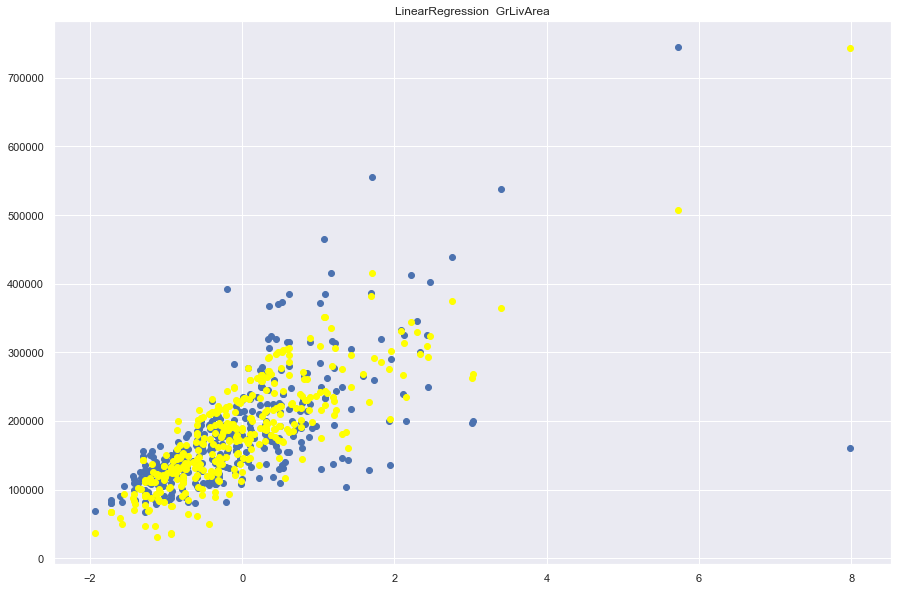

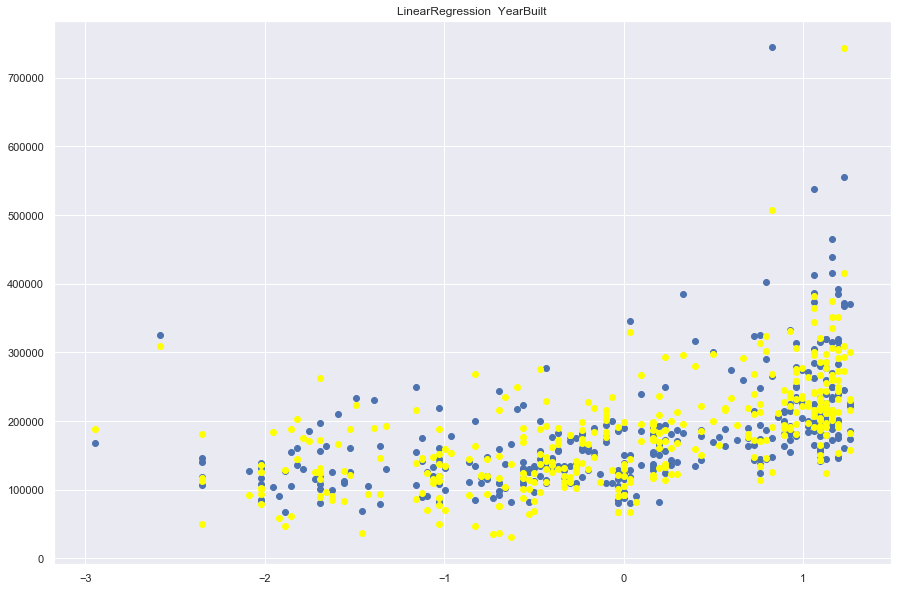

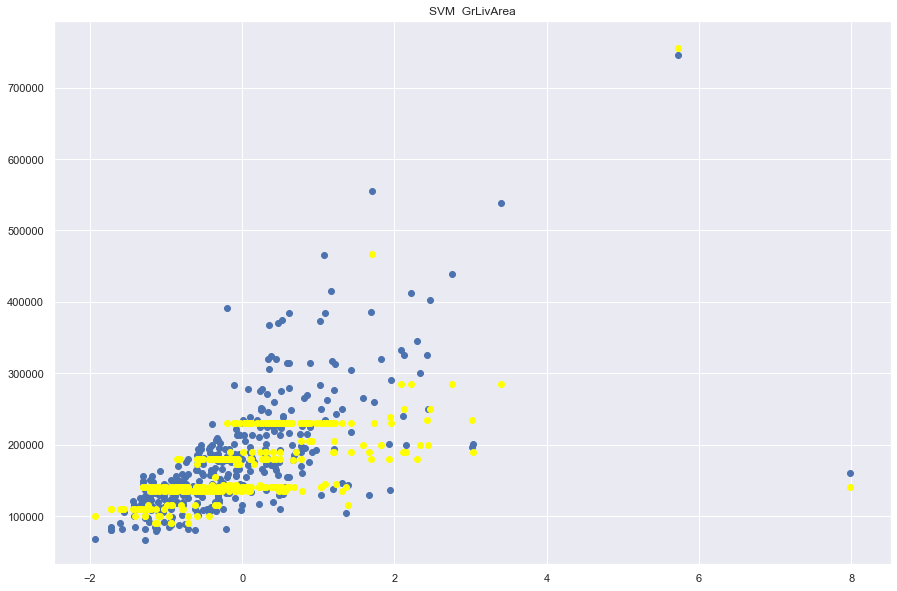

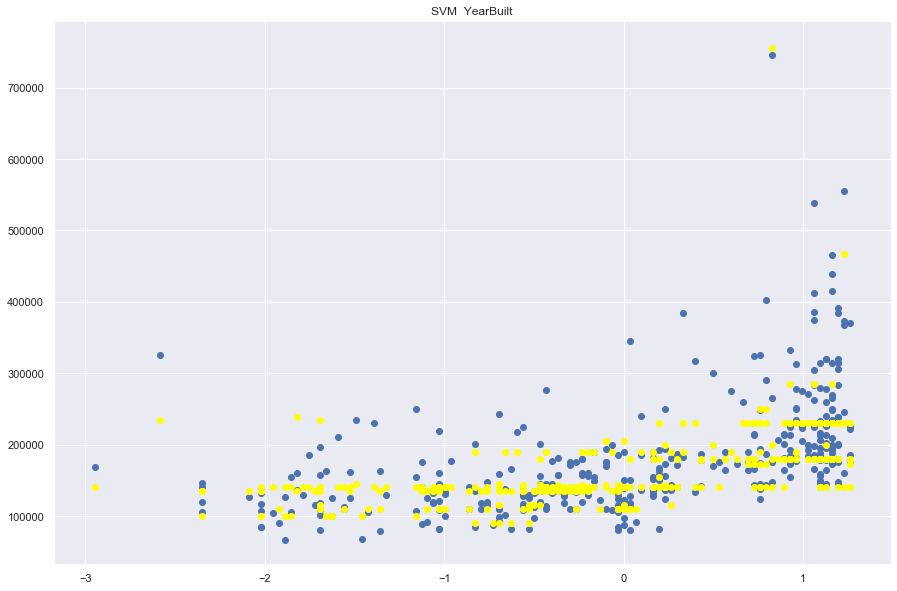

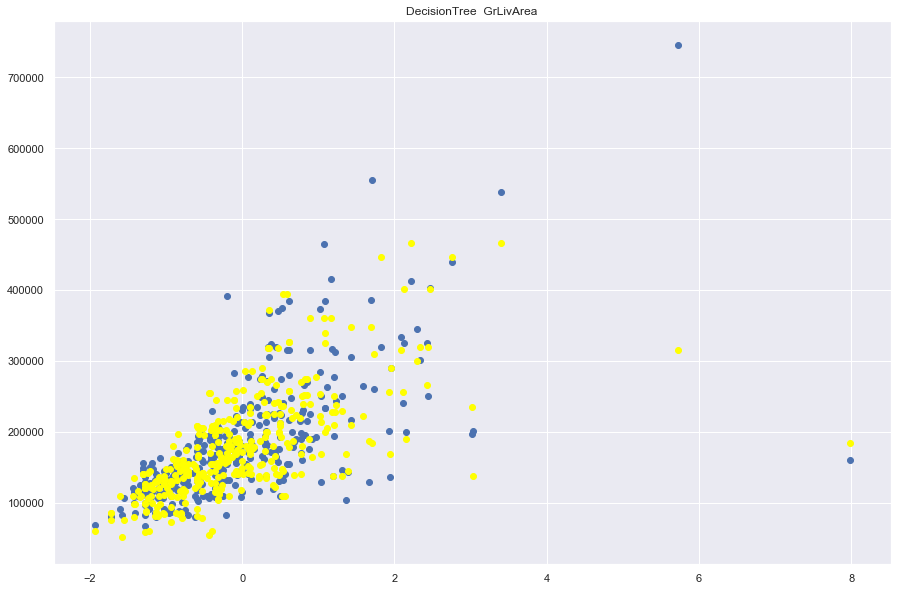

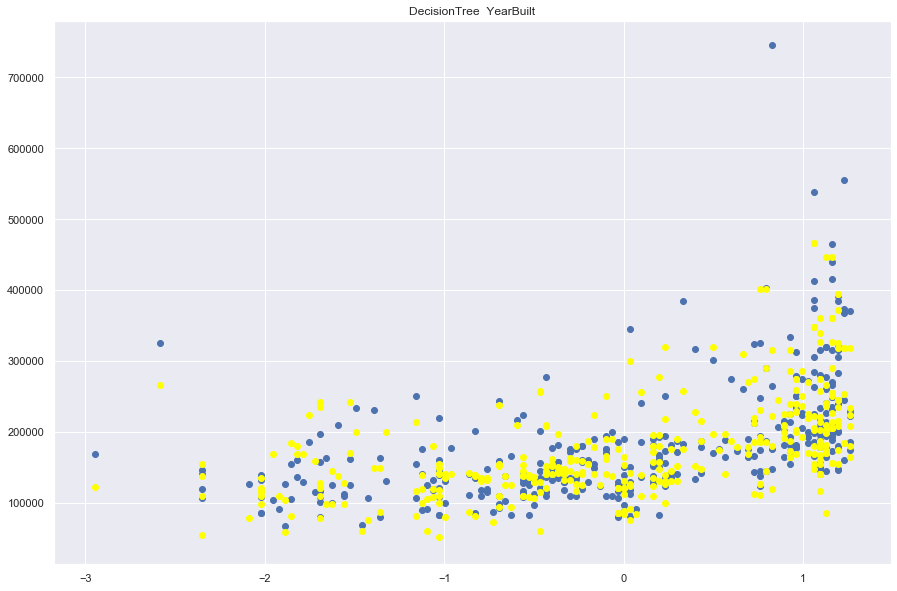

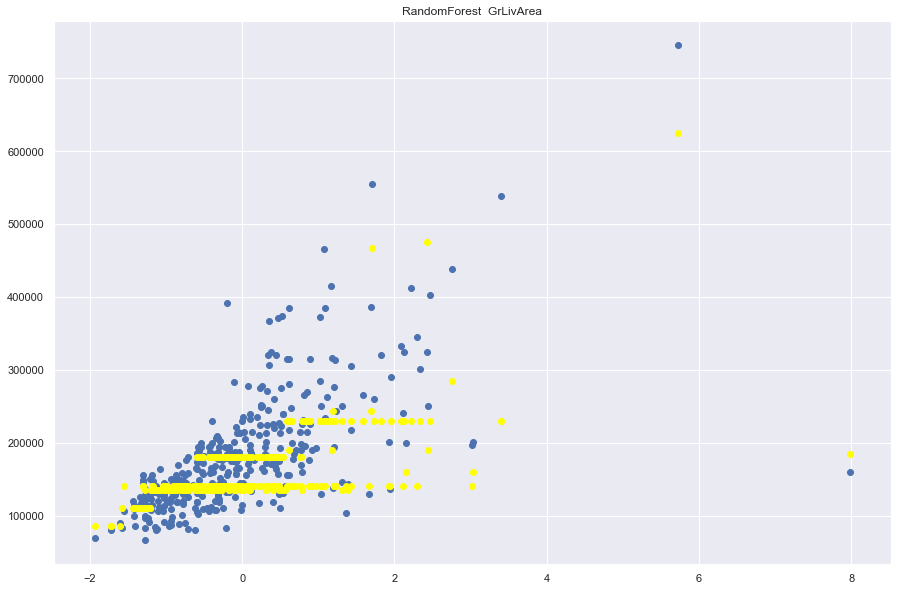

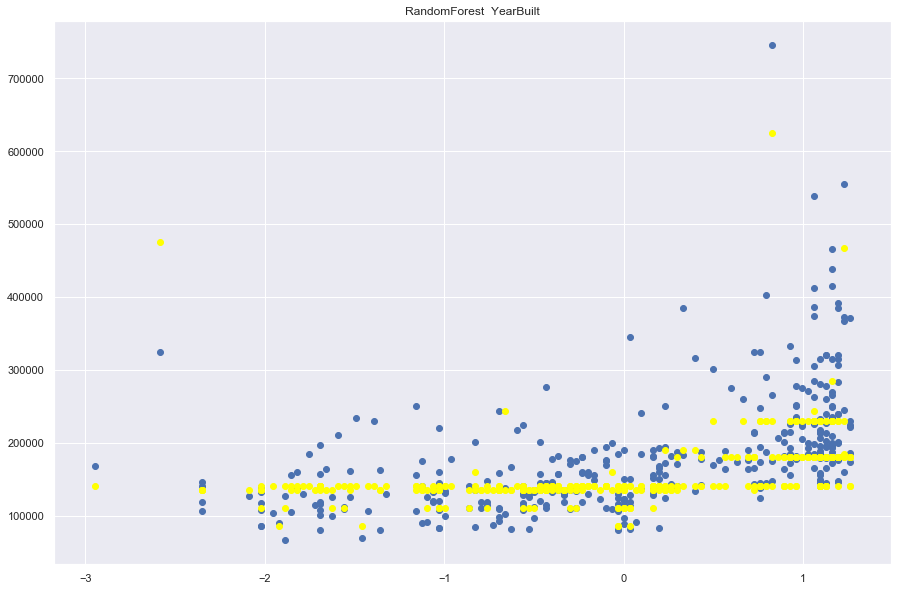

In [25]:
# グラフ表示
regression_graph(X_test_scaled, y_pred_li_adv, y_test_adv, graph_title='LinearRegression')
regression_graph(X_test_scaled, y_pred_s_adv, y_test_adv, graph_title='SVM')
regression_graph(X_test_scaled, y_pred_t_adv, y_test_adv, graph_title='DecisionTree')
regression_graph(X_test_scaled, y_pred_f_adv, y_test_adv, graph_title='RandomForest')

特徴量を増やしてみたところ、すべての手法において誤差が少なくなった。  
今回の'TotalBsmtSF'と'OverallQual'を加えた実行結果では約０.５〜１.０の低下が見られた。  
特に、決定木、SVMの減少幅が大きかった。  
各モデルの減少幅は以下の通り。
- LinearRegression
    - -5.15864E+08
- SVM
    - -8.20791E+08
- DecisionTree
    - -9.86001E+08
- RandomForest
    - -5.73952E+08

以上
